In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


# Nominal scenario - Comparison between controllers

In [2]:
# Load summary stats
summary_pid = pd.read_csv("simulation_results/statistics/results_pid_nominal_aggregated_low_var.csv")
summary_onoff = pd.read_csv("simulation_results/statistics/results_onoff_nominal_aggregated_low_var.csv")
summary_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_nominal_aggregated_low_var.csv")

summary_pid['source'] = 'PID'
summary_onoff['source'] = 'ON/OFF'
summary_fuzzy['source'] = 'Fuzzy'

summary_stats = pd.concat([summary_pid, summary_onoff, summary_fuzzy])

# Load per-run results
results_pid = pd.read_csv("simulation_results/statistics/results_pid_nominal_all_low_var.csv" )
results_onoff = pd.read_csv("simulation_results/statistics/results_onoff_nominal_all_low_var.csv")
results_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_nominal_all_low_var.csv")

# Label sources (if not consistent already)
results_pid['controller'] = 'PID'
results_onoff['controller'] = 'ON/OFF'
results_fuzzy['controller'] = 'Fuzzy'

results = pd.concat([results_pid, results_onoff, results_fuzzy])

palette = {'PID': 'skyblue', 'ON/OFF': 'salmon', 'Fuzzy': 'lightgreen'}

In [6]:

def boxplot_of_metrics(results, summary_stats, palette, scenario="nominal"):
    """
    Draws boxplots for each metric in the results DataFrame,
    overlaying mean and confidence intervals from summary_stats.
    """
    metrics = results['metric'].unique()

    for metric in metrics:
        plt.figure(figsize=(10, 6))

        # Filter data
        metric_results = results[results['metric'] == metric]
        metric_results_clean = metric_results.dropna(subset=['value'])
        print(metric_results_clean.head())
        metric_summary = summary_stats[summary_stats['metric'] == metric]

        # Draw boxplot
        ax = sns.boxplot(
            data=metric_results_clean,
            x='controller', y='value',
            palette=palette,
            hue='controller',
            showmeans=False
        )

        # Add mean + CI overlay
        for i, row in metric_summary.iterrows():
            x_pos = ['PID', 'ON/OFF', 'Fuzzy'].index(row['source'])

            # Mean as black dot
            ax.plot(x_pos, row['mean'], 'o', color='black')

            # CI for mean
            ax.errorbar(x=x_pos, y=row['mean'],
                       yerr=[[row['mean'] - row['mean_ci_lower']], [row['mean_ci_upper'] - row['mean']]],
                        fmt='none', ecolor='black', capsize=5, lw=2)

        plt.title(f"{metric} — Boxplot with Mean and CI")
        plt.xlabel("Controller")
        plt.ylabel(metric)
        plt.show()
        plt.savefig(f"plots/metrics_comparison/{metric}_{scenario}.png")


  controller  run              metric     value
0        PID    0  steady_state_error -0.105057
1        PID    1  steady_state_error -0.096488
2        PID    2  steady_state_error -0.150154
3        PID    3  steady_state_error -0.108034
4        PID    4  steady_state_error -0.143864


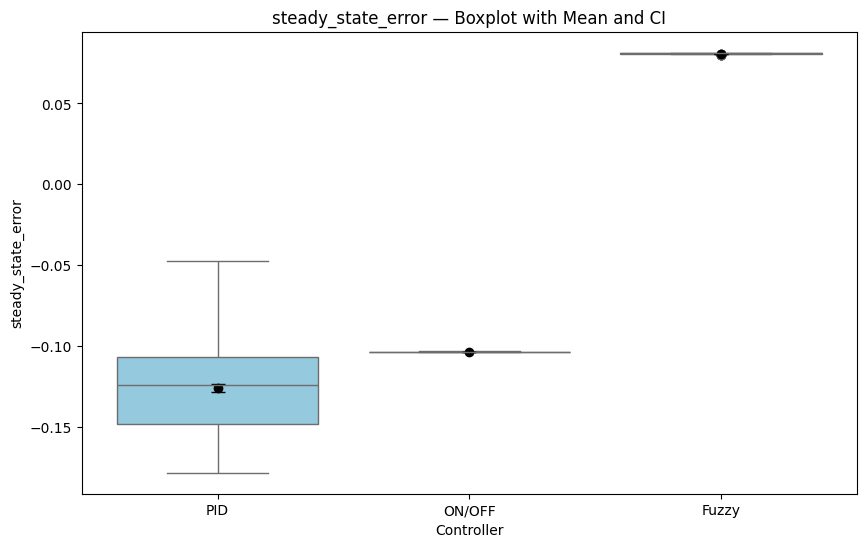

    controller  run             metric     value
100        PID    0  mean_square_error  0.301988
101        PID    1  mean_square_error  0.300939
102        PID    2  mean_square_error  0.325984
103        PID    3  mean_square_error  0.304609
104        PID    4  mean_square_error  0.326393


<Figure size 640x480 with 0 Axes>

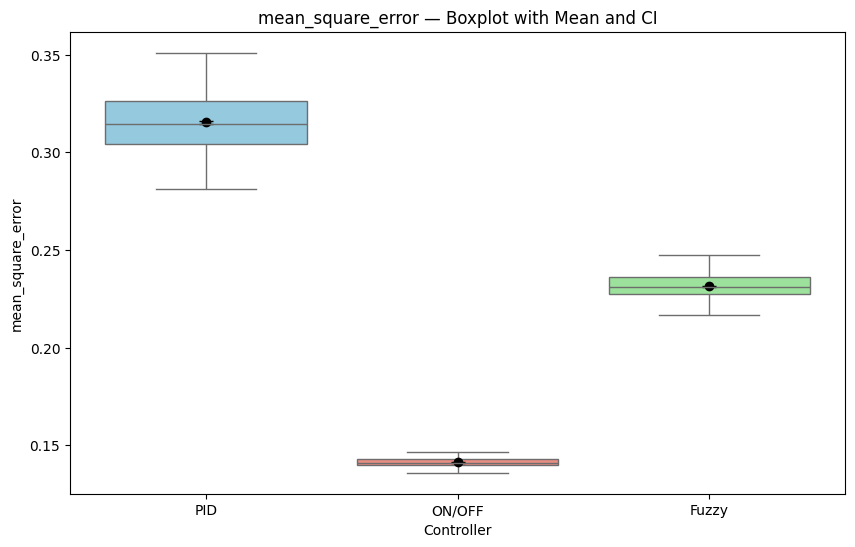

    controller  run     metric     value
200        PID    0  overshoot -0.021928
201        PID    1  overshoot -0.006418
202        PID    2  overshoot -0.069819
203        PID    3  overshoot -0.019191
204        PID    4  overshoot -0.047308


<Figure size 640x480 with 0 Axes>

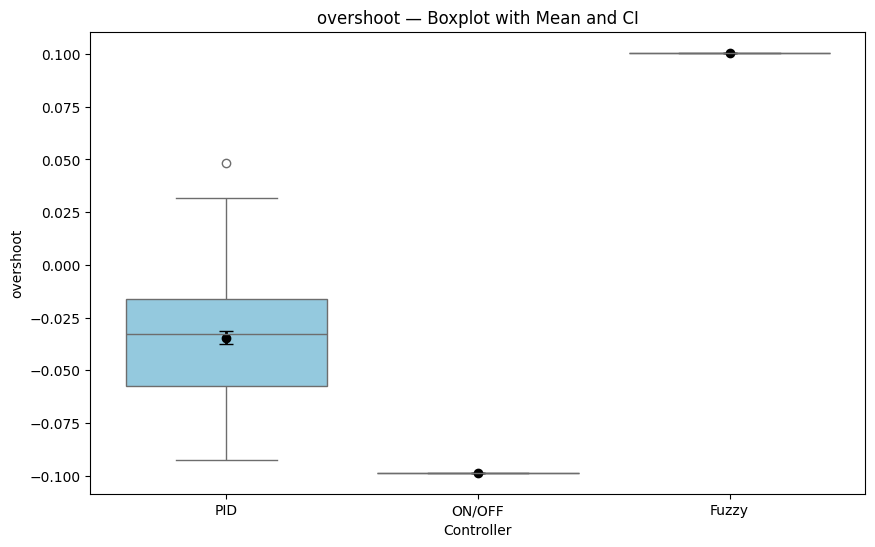

    controller  run        metric    value
300        PID    0  comfort_time  11391.0
301        PID    1  comfort_time  11392.0
302        PID    2  comfort_time  11142.0
303        PID    3  comfort_time  11360.0
304        PID    4  comfort_time  11123.0


<Figure size 640x480 with 0 Axes>

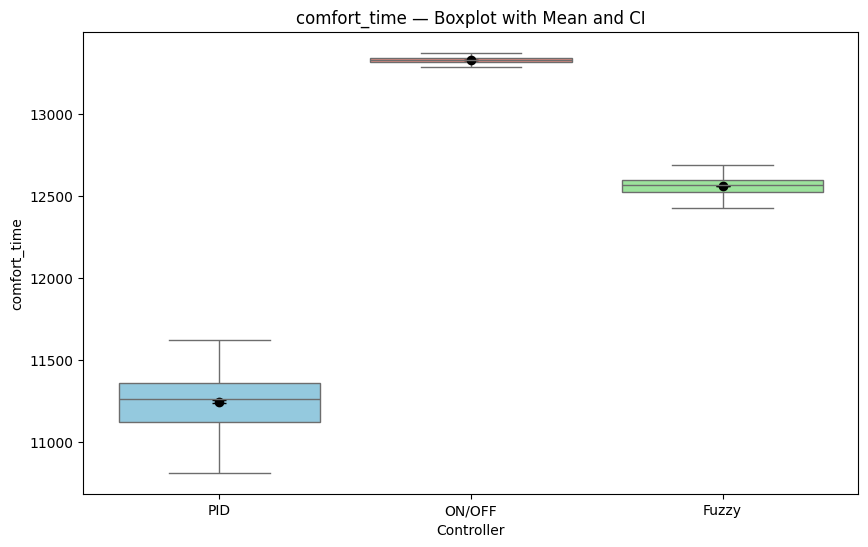

    controller  run           metric     value
400        PID    0  energy_consumed  0.915791
401        PID    1  energy_consumed  0.899403
402        PID    2  energy_consumed  1.040685
403        PID    3  energy_consumed  0.927028
404        PID    4  energy_consumed  1.032783


<Figure size 640x480 with 0 Axes>

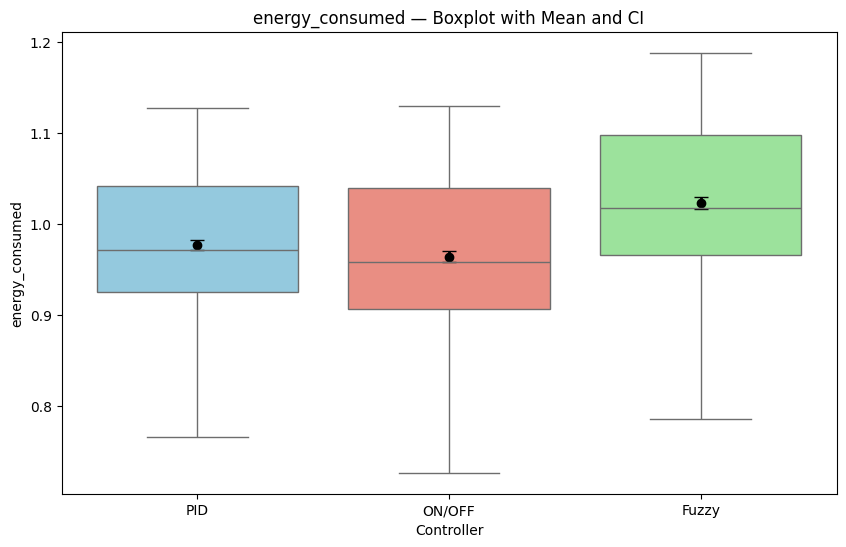

    controller  run         metric   value
500        PID    0  settling_time  3010.0
501        PID    1  settling_time  3009.0
502        PID    2  settling_time  3259.0
503        PID    3  settling_time  3041.0
504        PID    4  settling_time  3278.0


<Figure size 640x480 with 0 Axes>

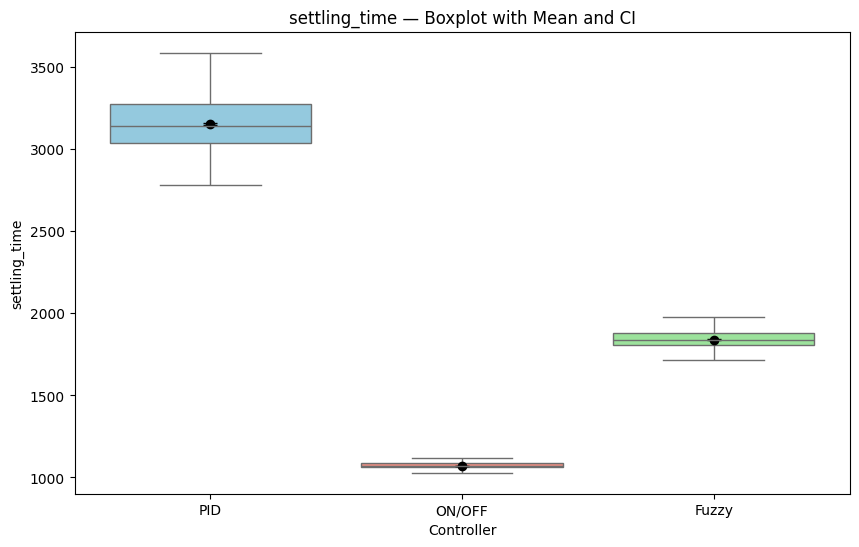

    controller  run     metric   value
600        PID    0  rise_time  4129.0
601        PID    1  rise_time  4133.0
602        PID    2  rise_time  4604.0
603        PID    3  rise_time  4189.0
604        PID    4  rise_time  4652.0


<Figure size 640x480 with 0 Axes>

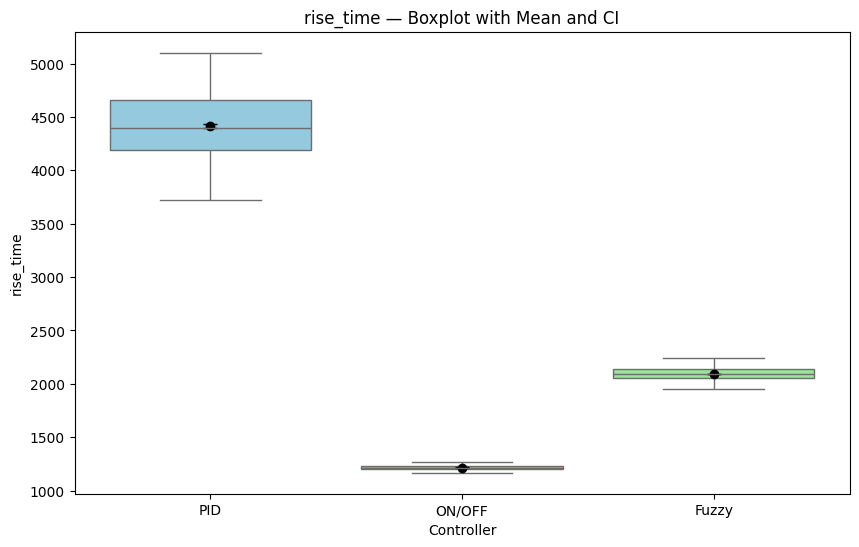

    controller  run                  metric  value
700        PID    0  number_of_oscillations    0.0
701        PID    1  number_of_oscillations    0.0
702        PID    2  number_of_oscillations    0.0
703        PID    3  number_of_oscillations    0.0
704        PID    4  number_of_oscillations    0.0


<Figure size 640x480 with 0 Axes>

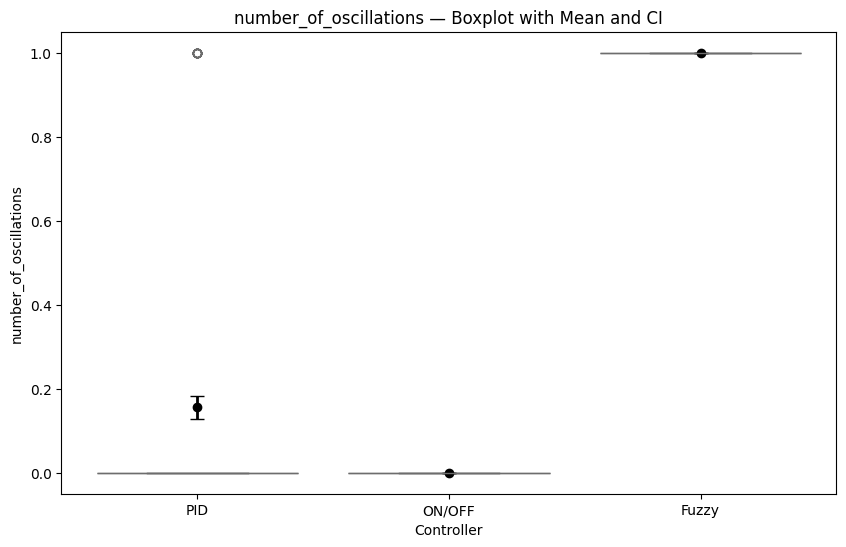

<Figure size 640x480 with 0 Axes>

In [7]:
boxplot_of_metrics(results, summary_stats, palette, "nominal")

# Noise scenario - Comparison between controllers

In [9]:
# Load summary stats
summary_pid = pd.read_csv("simulation_results/statistics/results_pid_with_noise_aggregated_low_var.csv")
summary_onoff = pd.read_csv("simulation_results/statistics/results_onoff_with_noise_aggregated_low_var.csv")
summary_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_with_noise_aggregated_low_var.csv")

summary_pid['source'] = 'PID'
summary_onoff['source'] = 'ON/OFF'
summary_fuzzy['source'] = 'Fuzzy'

summary_stats_noise = pd.concat([summary_pid, summary_onoff, summary_fuzzy])

# Load per-run results
results_pid = pd.read_csv("simulation_results/statistics/results_pid_with_noise_all_low_var.csv" )
results_onoff = pd.read_csv("simulation_results/statistics/results_onoff_with_noise_all_low_var.csv")
results_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_with_noise_all_low_var.csv")

# Label sources (if not consistent already)
results_pid['controller'] = 'PID'
results_onoff['controller'] = 'ON/OFF'
results_fuzzy['controller'] = 'Fuzzy'

results_noise = pd.concat([results_pid, results_onoff, results_fuzzy])


  controller  run              metric     value
0        PID    0  steady_state_error -0.097979
1        PID    1  steady_state_error -0.088188
2        PID    2  steady_state_error -0.147871
3        PID    3  steady_state_error -0.101553
4        PID    4  steady_state_error -0.141190


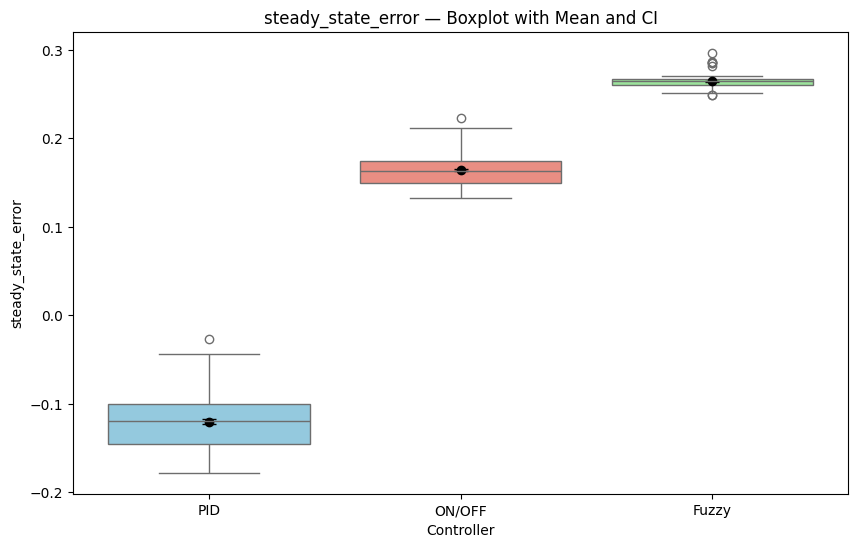

    controller  run             metric     value
100        PID    0  mean_square_error  0.301529
101        PID    1  mean_square_error  0.300631
102        PID    2  mean_square_error  0.325593
103        PID    3  mean_square_error  0.304184
104        PID    4  mean_square_error  0.326039


<Figure size 640x480 with 0 Axes>

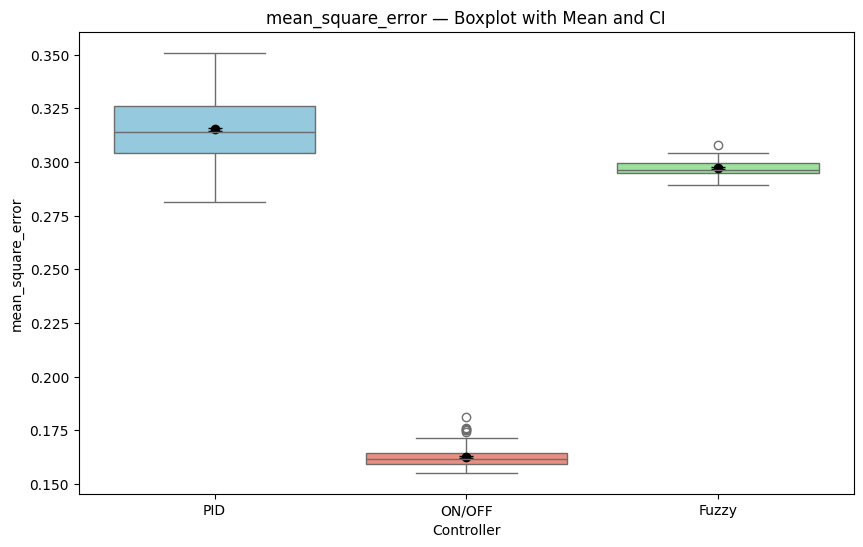

    controller  run     metric     value
200        PID    0  overshoot -0.004851
201        PID    1  overshoot  0.014911
202        PID    2  overshoot -0.062293
203        PID    3  overshoot -0.001569
204        PID    4  overshoot -0.037712


<Figure size 640x480 with 0 Axes>

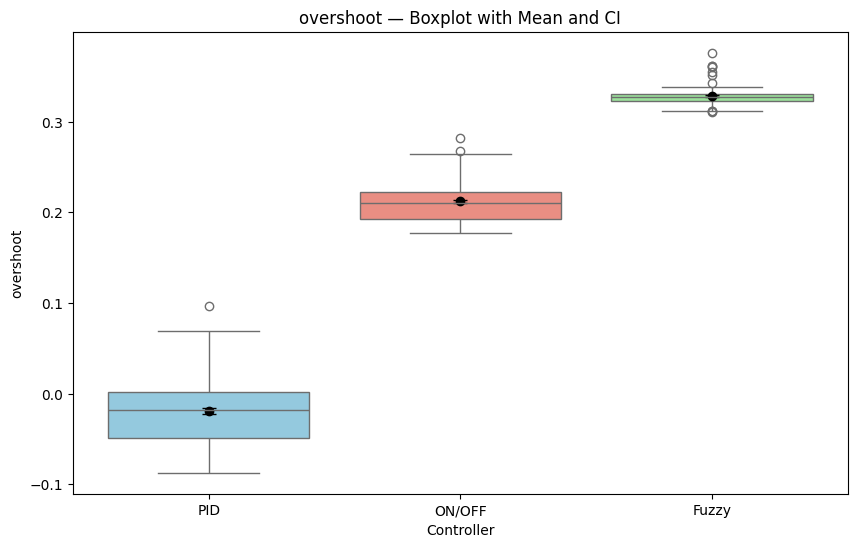

    controller  run        metric    value
300        PID    0  comfort_time  11389.0
301        PID    1  comfort_time  11391.0
302        PID    2  comfort_time  11142.0
303        PID    3  comfort_time  11361.0
304        PID    4  comfort_time  11122.0


<Figure size 640x480 with 0 Axes>

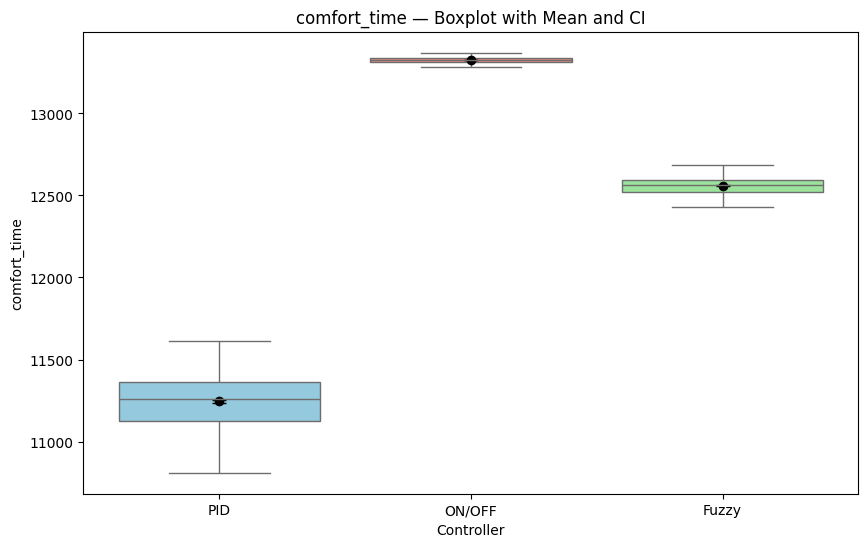

    controller  run           metric     value
400        PID    0  energy_consumed  0.920689
401        PID    1  energy_consumed  0.905360
402        PID    2  energy_consumed  1.042867
403        PID    3  energy_consumed  0.931906
404        PID    4  energy_consumed  1.035491


<Figure size 640x480 with 0 Axes>

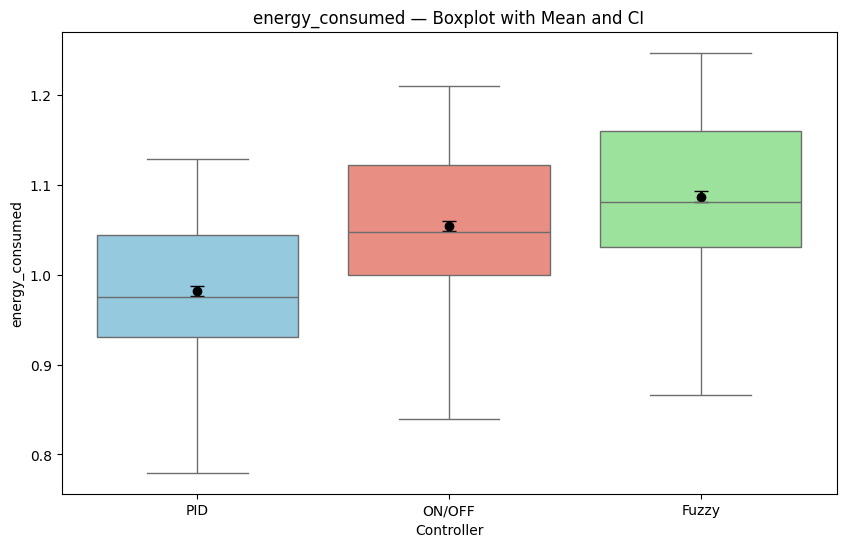

    controller  run         metric   value
500        PID    0  settling_time  3012.0
501        PID    1  settling_time  3010.0
502        PID    2  settling_time  3259.0
503        PID    3  settling_time  3040.0
504        PID    4  settling_time  3279.0


<Figure size 640x480 with 0 Axes>

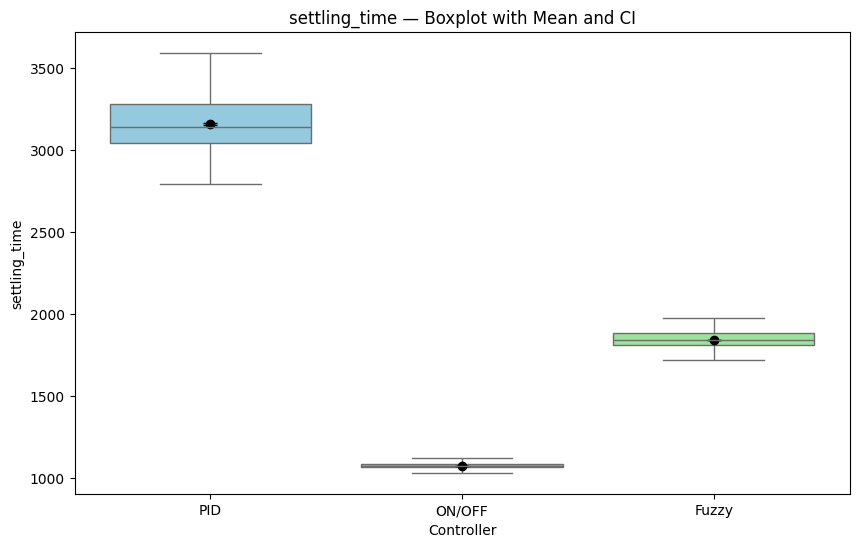

    controller  run     metric   value
600        PID    0  rise_time  4146.0
601        PID    1  rise_time  4150.0
602        PID    2  rise_time  4610.0
603        PID    3  rise_time  4207.0
604        PID    4  rise_time  4651.0


<Figure size 640x480 with 0 Axes>

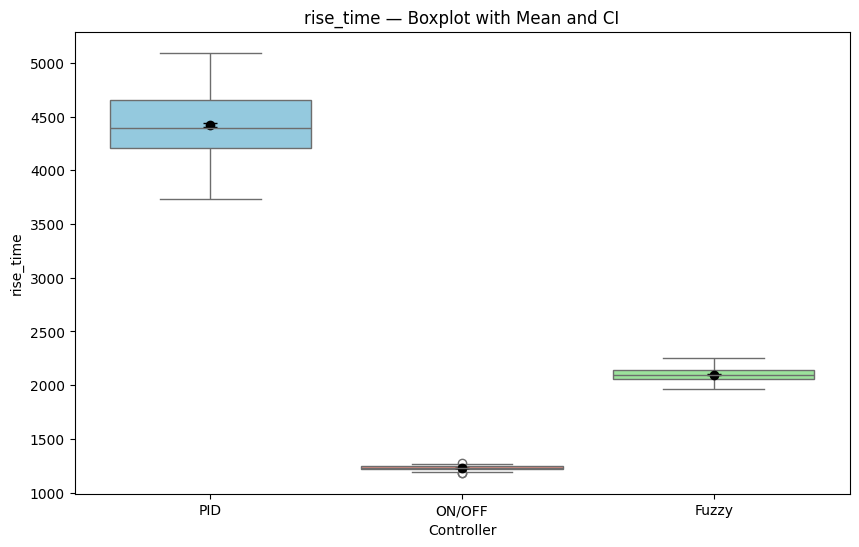

    controller  run                  metric  value
700        PID    0  number_of_oscillations    0.0
701        PID    1  number_of_oscillations    5.0
702        PID    2  number_of_oscillations    0.0
703        PID    3  number_of_oscillations    0.0
704        PID    4  number_of_oscillations    0.0


<Figure size 640x480 with 0 Axes>

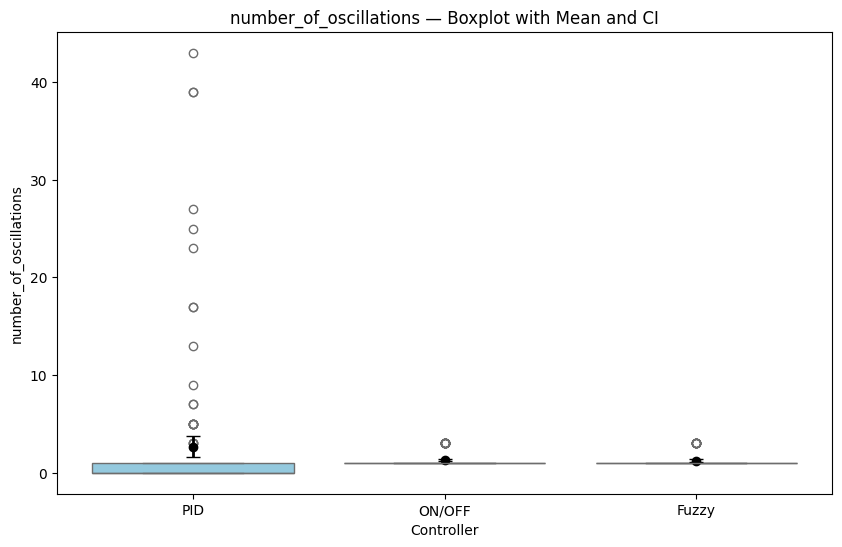

<Figure size 640x480 with 0 Axes>

In [10]:
boxplot_of_metrics(results_noise, summary_stats_noise, palette, "with_noise")

# Disturbances scenario 

In [11]:
# Load summary stats
summary_pid = pd.read_csv("simulation_results/statistics/results_pid_with_disturbances_aggregated.csv")
summary_onoff = pd.read_csv("simulation_results/statistics/results_onoff_with_disturbances_aggregated.csv")
summary_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_with_disturbances_aggregated.csv")

summary_pid['source'] = 'PID'
summary_onoff['source'] = 'ON/OFF'
summary_fuzzy['source'] = 'Fuzzy'

summary_stats_disturbances_ = pd.concat([summary_pid, summary_onoff, summary_fuzzy])

# Load per-run results
results_pid = pd.read_csv("simulation_results/statistics/results_pid_with_disturbances_all_low_var.csv" )
results_onoff = pd.read_csv("simulation_results/statistics/results_onoff_with_disturbances_all_low_var.csv")
results_fuzzy = pd.read_csv("simulation_results/statistics/results_fuzzy_with_disturbances_all_low_var.csv")

# Label sources (if not consistent already)
results_pid['controller'] = 'PID'
results_onoff['controller'] = 'ON/OFF'
results_fuzzy['controller'] = 'Fuzzy'

results_disturbances_ = pd.concat([results_pid, results_onoff, results_fuzzy])


  controller  run              metric     value
0        PID    0  steady_state_error -0.149824
1        PID    1  steady_state_error -0.111013
2        PID    2  steady_state_error -0.223328
3        PID    3  steady_state_error -0.141577
4        PID    4  steady_state_error -0.304593


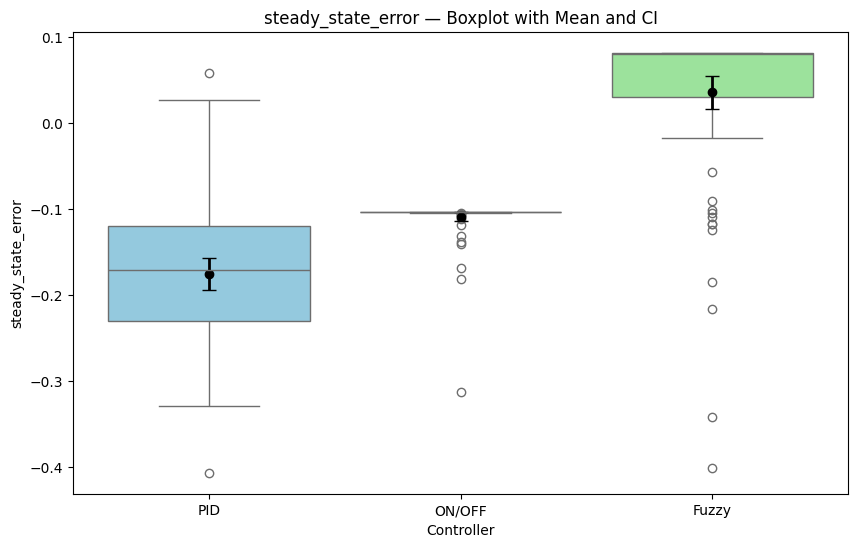

   controller  run             metric     value
73        PID    0  mean_square_error  0.312291
74        PID    1  mean_square_error  0.302366
75        PID    2  mean_square_error  0.343886
76        PID    3  mean_square_error  0.781470
77        PID    4  mean_square_error  0.332389


<Figure size 640x480 with 0 Axes>

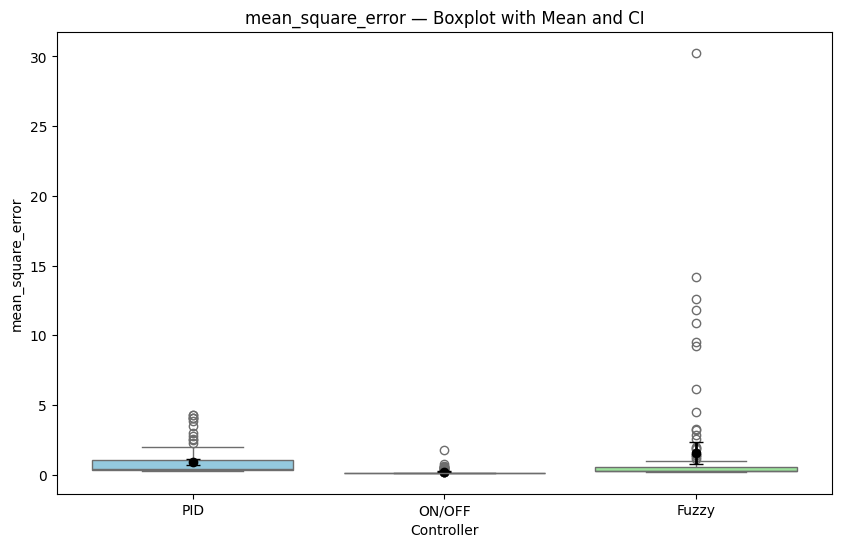

    controller  run     metric     value
173        PID    0  overshoot -0.007399
174        PID    1  overshoot -0.003253
175        PID    2  overshoot -0.099588
176        PID    3  overshoot -0.035236
177        PID    4  overshoot -0.044226


<Figure size 640x480 with 0 Axes>

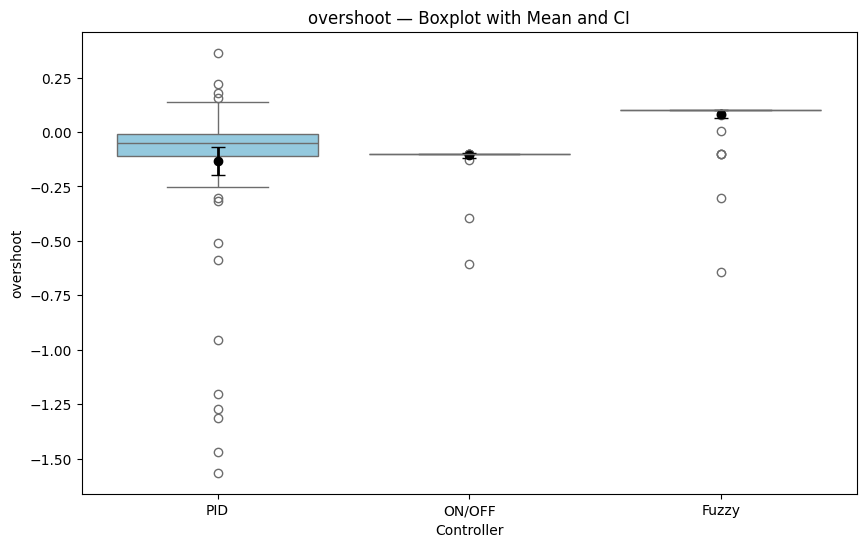

    controller  run        metric    value
273        PID    0  comfort_time  11391.0
274        PID    1  comfort_time  11392.0
275        PID    2  comfort_time  11142.0
276        PID    3  comfort_time   7539.0
277        PID    4  comfort_time  10962.0


<Figure size 640x480 with 0 Axes>

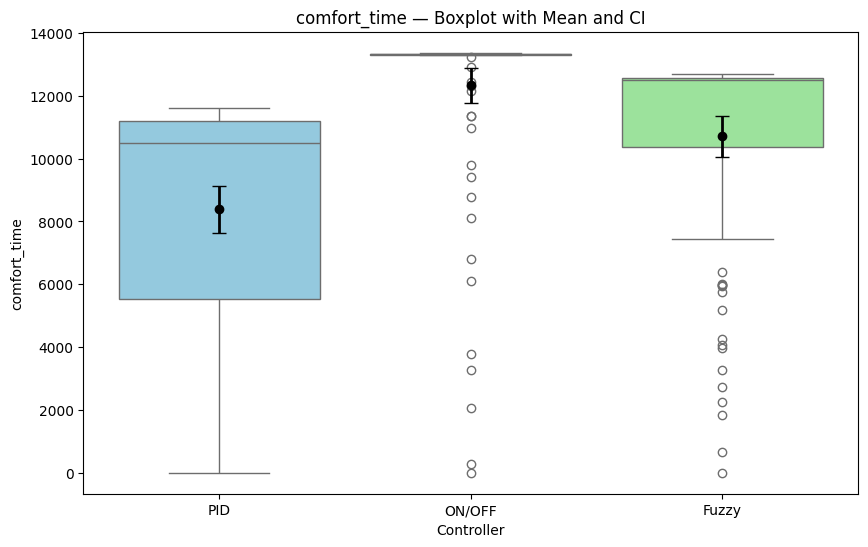

    controller  run           metric     value
373        PID    0  energy_consumed  1.007306
374        PID    1  energy_consumed  0.927569
375        PID    2  energy_consumed  1.164013
376        PID    3  energy_consumed  1.667442
377        PID    4  energy_consumed  1.048606


<Figure size 640x480 with 0 Axes>

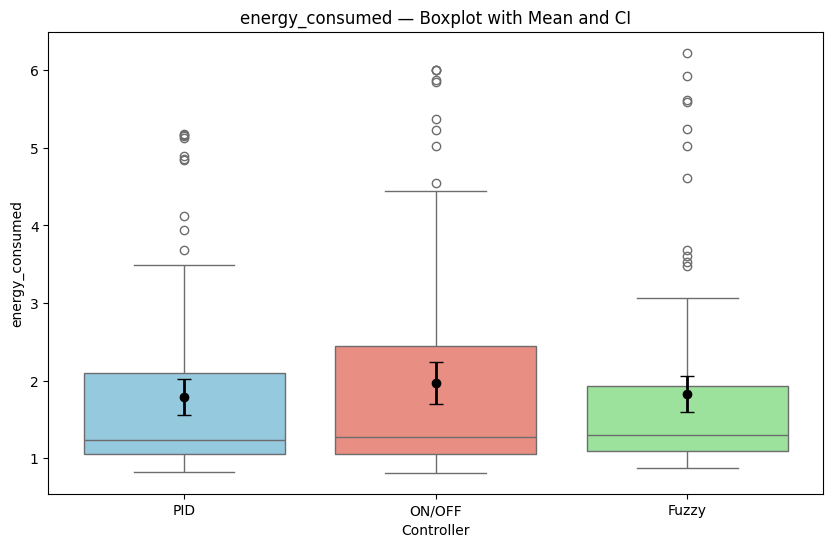

    controller  run         metric    value
473        PID    0  settling_time   3010.0
474        PID    1  settling_time   3009.0
475        PID    2  settling_time   3259.0
476        PID    3  settling_time  14400.0
477        PID    4  settling_time   3439.0


<Figure size 640x480 with 0 Axes>

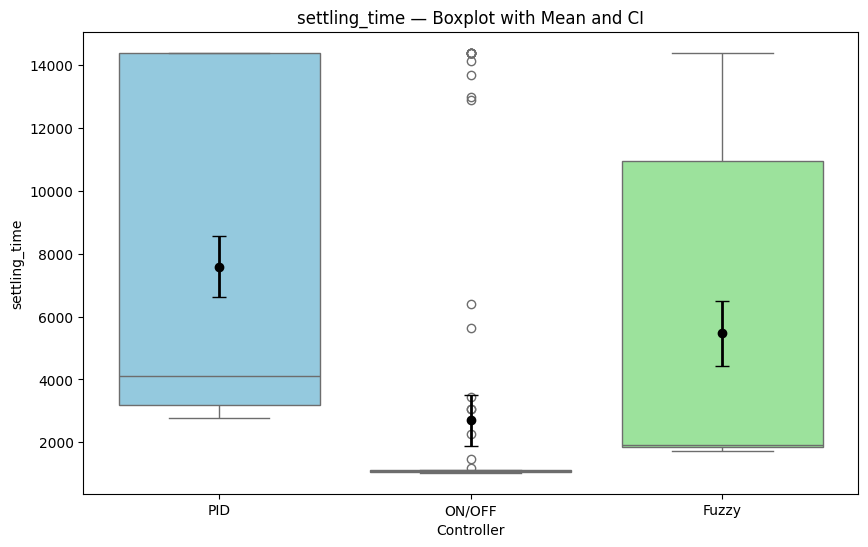

    controller  run     metric   value
573        PID    0  rise_time  4314.0
574        PID    1  rise_time  4133.0
575        PID    2  rise_time  4604.0
576        PID    3  rise_time  4189.0
577        PID    4  rise_time  4789.0


<Figure size 640x480 with 0 Axes>

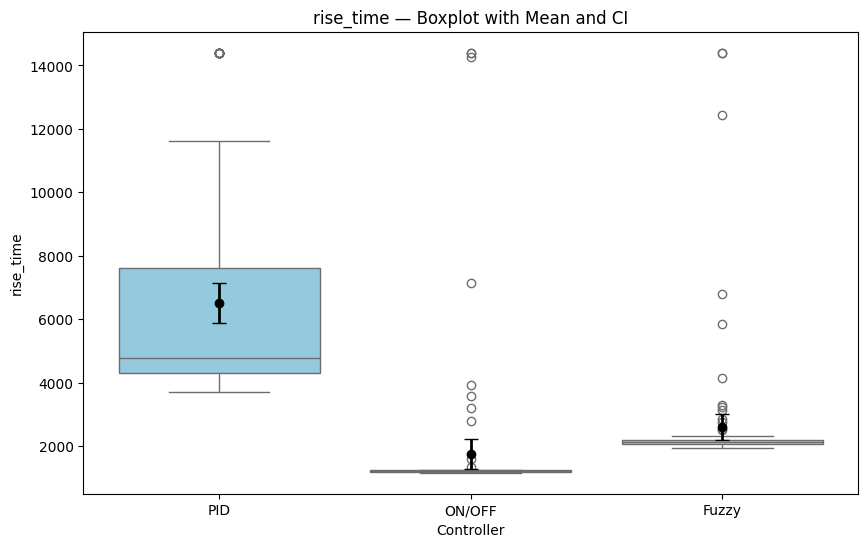

    controller  run                  metric  value
673        PID    0  number_of_oscillations    0.0
674        PID    1  number_of_oscillations    0.0
675        PID    2  number_of_oscillations    0.0
676        PID    3  number_of_oscillations    0.0
677        PID    4  number_of_oscillations    0.0


<Figure size 640x480 with 0 Axes>

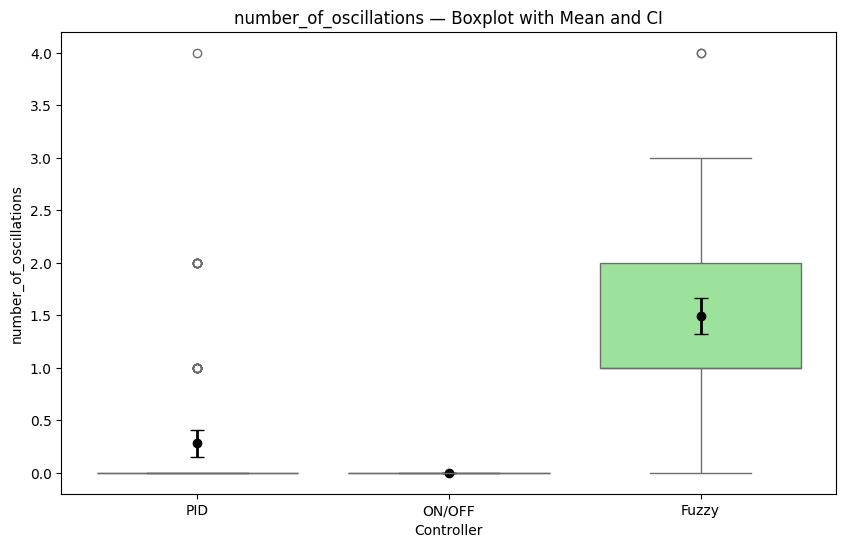

    controller  run         metric   value
773        PID    0  recovery_time   342.0
774        PID    1  recovery_time     0.0
775        PID    2  recovery_time     0.0
776        PID    3  recovery_time     0.0
777        PID    4  recovery_time  2734.0


<Figure size 640x480 with 0 Axes>

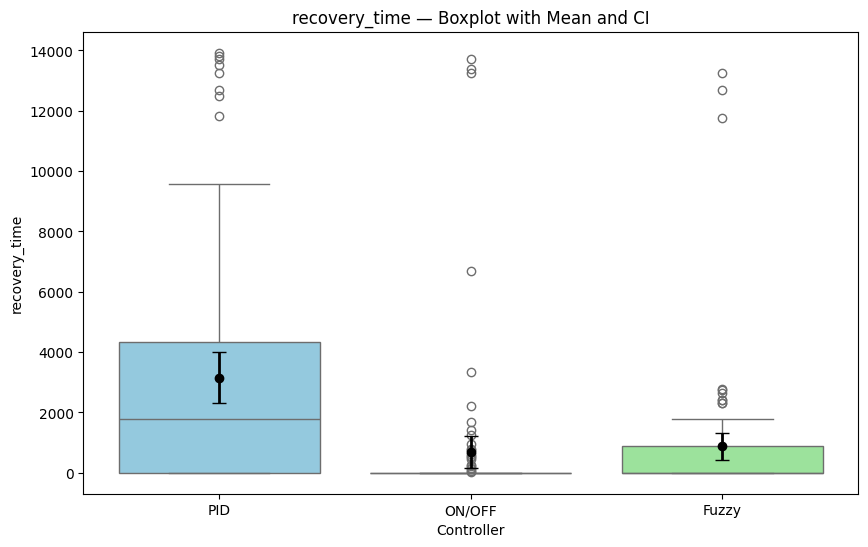

<Figure size 640x480 with 0 Axes>

In [12]:

boxplot_of_metrics(results_disturbances_, summary_stats_disturbances_, palette, "with_disturbances")